# CoStar spatial join

We have micro (parcel) level CoStar data on commercial vacancy. We need to aggregate these microdata to the TAZ level (so that we can then compare modeled and observed commercial vacancy rates at the superdistrict and county level). This is a geospatial task so we will use `geopandas`.

In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

from pathlib import Path
import getpass

user = getpass.getuser()

In [2]:
# Downloaded from https://data.bayareametro.gov/Land-People/CoStar-2020/ixvw-fdx3

df = pd.read_csv('CoStar_2020_20231106.csv')
df

C:\Users\dlevitt\AppData\Local\Temp\ipykernel_7228\3243500293.py:3: DtypeWarning: Columns (19,27,31,35,42,47,71,78,83) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('CoStar_2020_20231106.csv')


,PropertyID,PropertyType,Secondary Type,Market Name,Submarket Cluster,Submarket Name,Building Address,City,Zip,County Name,...,Total Relet Space (SF),Total Sublet Space (SF),Total Vacant Avail Relet Space (SF),Total Vacant Avail Sublet Space (SF),Total Vacant Available,Typical Floor Size,Water,Year Built,Year Renovated,Zoning
0,4216767,Health Care,Skilled Nursing Facility,East Bay/Oakland,680 Corridor North,Lafayette/Moraga/Orinda,1010 1st St,Lafayette,94549.0,Contra Costa,...,NaN,NaN,NaN,NaN,0,13577.0,NaN,1962.0,NaN,"C1, Lafayette"
1,4492067,Health Care,Assisted Living,East Bay/Oakland,680 Corridor North,Walnut Creek-BART/DT,1621 3rd Ave,Walnut Creek,94597.0,Contra Costa,...,NaN,NaN,NaN,NaN,0,3572.0,NaN,1966.0,NaN,R-8
2,4328286,Health Care,Skilled Nursing Facility,East Bay/Oakland,Oakland,Oakland-South,1901 3rd Ave,Oakland,94606.0,Alameda,...,NaN,NaN,NaN,NaN,0,9680.0,NaN,1964.0,NaN,"C-28, Oakland"
3,5387733,Health Care,Hospital,East Bay/Oakland,Oakland,Oakland-Port/Jack London,638 3rd St,Oakland,94607.0,Alameda,...,NaN,NaN,NaN,NaN,0,13253.0,NaN,1926.0,NaN,NaN
4,5509285,Health Care,Hospital,East Bay/Oakland,Oakland,Oakland-Port/Jack London,645 4th St,Oakland,94607.0,Alameda,...,NaN,NaN,NaN,NaN,0,6559.0,NaN,1926.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80435,7377641,Retail (Neighborhood Center),NaN,East Bay/Oakland,Napa County,Napa County,1739 Trancas St,Napa,94558.0,Napa,...,12110.0,0.0,0.0,0.0,0,12110.0,NaN,2011.0,NaN,NaN
80436,7377614,Retail (Neighborhood Center),NaN,East Bay/Oakland,Napa County,Napa County,1739 Trancas St,Napa,94558.0,Napa,...,3467.0,0.0,0.0,0.0,0,9022.0,NaN,2012.0,NaN,NaN
80437,7133670,Retail (Strip Center),Storefront Retail/Residential,East Bay/Oakland,Napa County,Napa County,1281 Vidovich Ave,Saint Helena,94574.0,Napa,...,6300.0,0.0,0.0,0.0,0,16776.0,NaN,2014.0,NaN,NaN
80438,7133678,Retail (Strip Center),Storefront Retail/Residential,East Bay/Oakland,Napa County,Napa County,1285 Vidovich Ave,Saint Helena,94574.0,Napa,...,5760.0,0.0,0.0,0.0,0,13214.0,NaN,2014.0,NaN,NaN


In [3]:
df.describe()

,PropertyID,Zip,Latitude,Longitude,Anchor GLA,Rentable Building Area,For Sale Price,Last Sale Price,Closest Transit Stop Dist (mi),Closest Transit Stop Walk Time (min),...,Total Available Space (SF),Total New Space (SF),Total Relet Space (SF),Total Sublet Space (SF),Total Vacant Avail Relet Space (SF),Total Vacant Avail Sublet Space (SF),Total Vacant Available,Typical Floor Size,Year Built,Year Renovated
count,8.044000e+04,80435.000000,80368.000000,80368.000000,9.800000e+02,8.014900e+04,1.950000e+03,2.457200e+04,52547.000000,52547.000000,...,1.196800e+04,0.0,1.196800e+04,11968.000000,11968.000000,11968.000000,80440.000000,7.929900e+04,61949.000000,2373.000000
mean,3.603253e+06,94597.663256,37.729110,-122.213794,5.812624e+04,2.125780e+04,2.587477e+06,2.202275e+08,0.891248,17.824957,...,1.817655e+04,NaN,1.683945e+04,1449.520053,9970.176805,672.538018,1583.441211,1.449308e+04,1960.061050,1994.901391
std,2.717905e+06,513.495045,0.326795,0.268735,1.019345e+05,5.617880e+04,3.343507e+06,2.771932e+09,0.720266,14.405315,...,4.494286e+04,NaN,4.376011e+04,10958.747982,25376.810815,6894.355949,10809.378280,3.536222e+04,29.380246,12.171119
min,3.514700e+04,9503.000000,36.981289,-123.426734,0.000000e+00,0.000000e+00,6.490000e+04,0.000000e+00,0.000000,0.000000,...,1.000000e+02,NaN,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,1845.000000,1900.000000
25%,3.384275e+05,94122.000000,37.470370,-122.409366,1.643750e+04,3.100000e+03,8.889160e+05,5.890000e+05,0.300000,6.000000,...,2.400000e+03,NaN,2.050000e+03,0.000000,300.000000,0.000000,0.000000,2.400000e+03,1941.000000,1988.000000
50%,4.478802e+06,94565.000000,37.744156,-122.236450,3.400000e+04,6.800000e+03,1.596944e+06,1.200000e+06,0.700000,14.000000,...,5.519000e+03,NaN,5.000000e+03,0.000000,2737.000000,0.000000,0.000000,5.309000e+03,1966.000000,1998.000000
75%,5.911464e+06,94956.500000,37.873919,-121.992825,6.461875e+04,1.824600e+04,3.000000e+06,3.001079e+06,1.300000,26.000000,...,1.543350e+04,NaN,1.400000e+04,0.000000,8288.250000,0.000000,0.000000,1.400000e+04,1982.000000,2003.000000
max,8.010477e+06,97409.000000,38.845455,-119.269428,1.680529e+06,3.471123e+06,4.370000e+07,3.920564e+10,2.950000,59.000000,...,1.600000e+06,NaN,1.600000e+06,397188.000000,760000.000000,240563.000000,760000.000000,3.471123e+06,2016.000000,2012.000000


In [4]:
gdf = gpd.GeoDataFrame(
    df, geometry=gpd.points_from_xy(df.Longitude, df.Latitude), crs="EPSG:4326"
)
gdf

,PropertyID,PropertyType,Secondary Type,Market Name,Submarket Cluster,Submarket Name,Building Address,City,Zip,County Name,...,Total Sublet Space (SF),Total Vacant Avail Relet Space (SF),Total Vacant Avail Sublet Space (SF),Total Vacant Available,Typical Floor Size,Water,Year Built,Year Renovated,Zoning,geometry
0,4216767,Health Care,Skilled Nursing Facility,East Bay/Oakland,680 Corridor North,Lafayette/Moraga/Orinda,1010 1st St,Lafayette,94549.0,Contra Costa,...,NaN,NaN,NaN,0,13577.0,NaN,1962.0,NaN,"C1, Lafayette",POINT (-122.11609 37.89329)
1,4492067,Health Care,Assisted Living,East Bay/Oakland,680 Corridor North,Walnut Creek-BART/DT,1621 3rd Ave,Walnut Creek,94597.0,Contra Costa,...,NaN,NaN,NaN,0,3572.0,NaN,1966.0,NaN,R-8,POINT (-122.06869 37.91921)
2,4328286,Health Care,Skilled Nursing Facility,East Bay/Oakland,Oakland,Oakland-South,1901 3rd Ave,Oakland,94606.0,Alameda,...,NaN,NaN,NaN,0,9680.0,NaN,1964.0,NaN,"C-28, Oakland",POINT (-122.25015 37.80028)
3,5387733,Health Care,Hospital,East Bay/Oakland,Oakland,Oakland-Port/Jack London,638 3rd St,Oakland,94607.0,Alameda,...,NaN,NaN,NaN,0,13253.0,NaN,1926.0,NaN,NaN,POINT (-122.28027 37.79882)
4,5509285,Health Care,Hospital,East Bay/Oakland,Oakland,Oakland-Port/Jack London,645 4th St,Oakland,94607.0,Alameda,...,NaN,NaN,NaN,0,6559.0,NaN,1926.0,NaN,NaN,POINT (-122.27999 37.79886)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80435,7377641,Retail (Neighborhood Center),NaN,East Bay/Oakland,Napa County,Napa County,1739 Trancas St,Napa,94558.0,Napa,...,0.0,0.0,0.0,0,12110.0,NaN,2011.0,NaN,NaN,POINT (-122.30651 38.32065)
80436,7377614,Retail (Neighborhood Center),NaN,East Bay/Oakland,Napa County,Napa County,1739 Trancas St,Napa,94558.0,Napa,...,0.0,0.0,0.0,0,9022.0,NaN,2012.0,NaN,NaN,POINT (-122.30678 38.32127)
80437,7133670,Retail (Strip Center),Storefront Retail/Residential,East Bay/Oakland,Napa County,Napa County,1281 Vidovich Ave,Saint Helena,94574.0,Napa,...,0.0,0.0,0.0,0,16776.0,NaN,2014.0,NaN,NaN,POINT (-122.46375 38.49992)
80438,7133678,Retail (Strip Center),Storefront Retail/Residential,East Bay/Oakland,Napa County,Napa County,1285 Vidovich Ave,Saint Helena,94574.0,Napa,...,0.0,0.0,0.0,0,13214.0,NaN,2014.0,NaN,NaN,POINT (-122.46350 38.49969)


<Axes: >

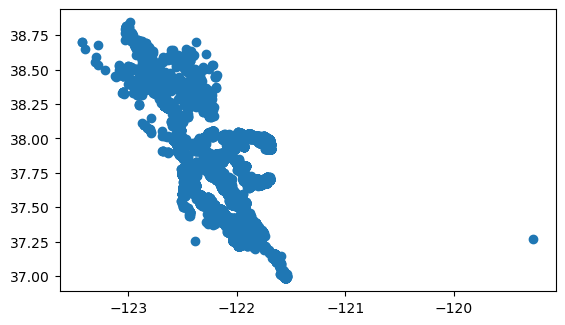

In [5]:
gdf.plot()

<Axes: >

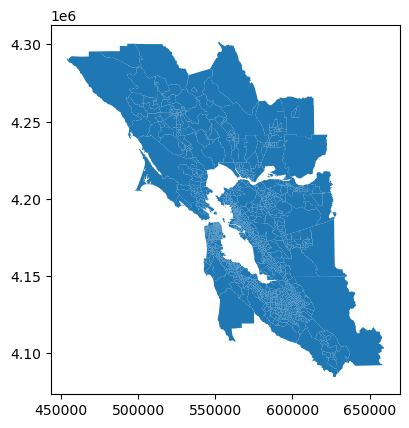

In [6]:
box_path = Path(rf"C:\Users\{user}\Box\Modeling and Surveys\Urban Modeling\Spatial\Zones\TAZ1454")

taz1454 = gpd.read_file(box_path / 'zones1454.shp')

taz1454.plot()


In [7]:
# Spatially join each establishment to its nearest TAZ
joined = gdf.to_crs(taz1454.crs).sjoin_nearest(taz1454, how="left", distance_col="Distance")

joined.columns

Index(['PropertyID', 'PropertyType', 'Secondary Type', 'Market Name',
       'Submarket Cluster', 'Submarket Name', 'Building Address', 'City',
       'Zip', 'County Name',
       ...
       'pop100', 'landacre', 'watracre', 'area', 'perimeter', 'acres',
       'zone_id', 'county_mtc', 'gqpop', 'Distance'],
      dtype='object', length=122)

<Axes: >

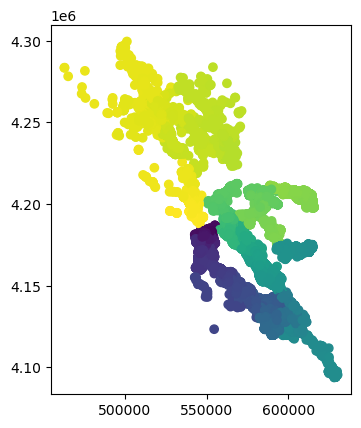

In [8]:
# Manual inspection indicates that all records within 1000 [linear units - not actually sure which] are good to go
joined = joined[joined['Distance'] < 1000]
joined.plot(column='taz1454')

## Aggregating the data

Manual inspection reveals that the main columns of use are "Rentable Building Area" and "Percent Leased" - other columns have too much missingness. So we will use these two columns to calculate "Percent Vacancy" at a TAZ level via subtraction and weighted average.

In [12]:
# Filter out one residential property type and keep only relevant columns
df = joined.loc[joined['PropertyType'] != 'Multi-Family', ['Rentable Building Area', 'Percent Leased', 'taz1454']].dropna()
df.columns = ['non_residential_sqft', 'pct_leased', 'TAZ']

df['pct_vacant'] = 1 - df['pct_leased'] / 100
df['vacant'] = df['pct_vacant'] * df['non_residential_sqft']

df

,non_residential_sqft,pct_leased,TAZ,pct_vacant,vacant
0,14032.0,0.00,1150.0,1.0000,14032.0000
1,7144.0,0.00,1134.0,1.0000,7144.0000
2,9680.0,0.00,934.0,1.0000,9680.0000
3,13253.0,0.00,967.0,1.0000,13253.0000
4,6559.0,0.00,967.0,1.0000,6559.0000
...,...,...,...,...,...
80435,12110.0,0.00,1305.0,1.0000,12110.0000
80436,9022.0,61.57,1306.0,0.3843,3467.1546
80437,6300.0,0.00,1314.0,1.0000,6300.0000
80438,5760.0,0.00,1314.0,1.0000,5760.0000


In [13]:
grouped = df.groupby('TAZ')[['vacant', 'non_residential_sqft']].sum()
grouped['non_residential_vacancy'] = grouped['vacant'] / grouped['non_residential_sqft']
del grouped['vacant']
grouped

,non_residential_sqft,non_residential_vacancy
TAZ,,
1.0,5945278.0,0.100360
2.0,9943897.0,0.104197
3.0,1173114.0,0.053345
4.0,6432617.0,0.224266
5.0,6368810.0,0.080895
...,...,...
1450.0,201497.0,0.031211
1451.0,78786.0,0.020943
1452.0,448024.0,0.044551


In [14]:
grouped.to_csv('costar_2020_taz1454.csv')